In [98]:
import pandas as pd
import glob, os, re
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm, ticker
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

def getinfo(place, year, stage):
    df = pd.read_csv('../DataBase/Experiment_period.txt')
    df_ = df[df['region']==place][df['year']==year][df['index']==stage]
    begintime = pd.to_datetime(df_['begin'].values[0])
    endtime = pd.to_datetime(df_['end'].values[0])
    month = str(begintime.month).zfill(2)
    return begintime, endtime, month

In [114]:
year = 2023
place = 'Keelung'
path = f'/Volumes/home/Research/Detection_snap/Keelung/23'
begintime, endtime, month = getinfo(place, year, 3)

timepath = f'../DataBase/Data_CWA/lunar_time_{year}.csv'

dtime = pd.read_csv(timepath)
sunpath = glob.glob(f'../DataBase/Data_CWA/sunset_time_keelung{year}.csv')[0]
dsun = pd.read_csv(sunpath)
tidepath = glob.glob(f'../DataBase/Data_CWA/{year}_12191_長潭里_tide.csv')[0]
dtide = pd.read_csv(tidepath, skiprows=20)

lightpath = glob.glob(f'../DataBase/Temperature/Keelung/{str(year)[2:4]}{month}*.xlsx')[0] if glob.glob(f'../DataBase/Temperature/Keelung/{str(year)[2:4]}{month}*.xlsx') != [] else None





In [115]:
lightpath

'../DataBase/Temperature/Keelung/230829-230914.xlsx'

In [116]:
targer_time = [29,30,1,2,3,13,14,15,16,17]

In [117]:
def plotnight(time, ax, ymin, ymax):
    year = time.year
    month = time.month
    day = time.day
    nextdate = time+timedelta(days=1)
    nextyear = nextdate.year
    nextmonth = nextdate.month
    nextday = nextdate.day
    
    if year == 2024:
        sunpath = glob.glob(f'../DataBase/Data_CWA/sunset_time_keelung{year}.csv')[0]
        df = pd.read_csv(sunpath)
    else:
        df = dsun
    sunset_hr = int((df['SUNSET'][df['TIME'] == f'{year}/{month}/{day}'].values[0]).rsplit(':')[-2])    
    sunset_min = int((df['SUNSET'][df['TIME'] == f'{year}/{month}/{day}'].values[0]).rsplit(':')[-1])
    
    if nextyear != year:
        sunpath = glob.glob(f'../DataBase/Data_CWA/sunset_time_keelung{nextyear}.csv')[0]
        df = pd.read_csv(sunpath)
        
    sunrise_hr = int((df['SUNRSET'][df['TIME'] == f'{nextyear}/{nextmonth}/{nextday}'].values[0]).rsplit(':')[-2])
    sunrise_min = int((df['SUNRSET'][df['TIME'] == f'{nextyear}/{nextmonth}/{nextday}'].values[0]).rsplit(':')[-1])
    
    ax.fill_betweenx(y=[ymin-5, ymax], x1=datetime(year, month, day, sunset_hr, sunset_min), x2=datetime(nextyear, nextmonth, nextday, sunrise_hr, sunrise_min), color='orange', alpha=0.1)
    return ax
def plotlight(time, ax, excess=13000):
    month = str(time.month).zfill(2)
    day = str(time.day).zfill(2)
    if lightpath is not None:
        dlight = pd.read_excel(lightpath, header=None, names=['Time', 'Temp', 'Light'], skiprows=110,) 
        dlight = dlight[dlight['Light']<=excess]
        dlight_ = dlight[dlight['Time'] <= np.datetime64(f'{year}-{month}-{day} 23:59:59')][dlight['Time'] >= np.datetime64(f'{year}-{month}-{day} 00:00:00')]
        try:
            begintime = pd.to_datetime(str(dlight_['Time'].values[0]))
            endtime   = pd.to_datetime(str(dlight_['Time'].values[-1]))
            ax.plot(pd.to_datetime(dlight_['Time']), dlight_['Light'], 'grey', lw=0.3)
        except:
            pass
        # ax.set_ylabel('Illumination (lux)', color='grey', fontsize=10)
        ax.tick_params(axis='y', colors='grey')
        ax.set_yticklabels(labels=[])
    return ax

def plot_histlight(begin, end, excess=13000):
    
    beginyear = begin.year
    beginmonth = str(begin.month).zfill(2)
    beginday = str(begin.day).zfill(2)
    endyear = end.year
    endmonth = str(end.month).zfill(2)
    endday = str(end.day).zfill(2)    
    
    dlight = pd.read_excel(lightpath, header=None, names=['Time', 'Temp', 'Light'], skiprows=110,) 
    dlight = dlight[dlight['Light']<=excess]
    dlight_ = dlight[dlight['Time'] >= np.datetime64(f'{beginyear}-{beginmonth}-{beginday} 00:00:00')][dlight['Time'] <= np.datetime64(f'{endyear}-{endmonth}-{endday} 23:59:59')]
    
    index = defaultdict(list)
    for i in range(0,24):
        index[str(i)].append(np.nan)
    for i in range(len(dlight_)):
        time = pd.to_datetime(dlight_['Time'].values[i])
        light = dlight_['Light'].values[i]
        hr = time.hour
        index[str(hr)].append(light)

    mean = []
    for key in index.keys():
        mean.append(np.nanmean(index[key]))
        
    return index.keys(), mean

In [118]:
alldf = pd.DataFrame()
for filepath in sorted(glob.glob(f'{path}/*csv')):
    date = re.split('[_|/|.]', filepath)[-2]
    yy = date[:2]; mm = int(date[2:4]); dd = int(date[4:])
    if yy == '23':
        m_date = dtime['lunar'][dtime['national']==f'{mm}/{dd}'].values[0]
    elif yy == '24':
        timepath = f'../DataBase/Data_CWA/lunar_time_2024.csv'
        dtime = pd.read_csv(timepath)
        print('fffff')
        m_date = dtime['lunar'][dtime['national']==f'{mm}/{dd}'].values[0]
    m_mm = re.split('/',m_date)[0]; m_dd = re.split('/',m_date)[-1]
    
    if int(m_dd) in targer_time:
        df = pd.read_csv(filepath)
        alldf = pd.concat([alldf, df])
    if int(m_dd) in [1, 15]:
        align_mm = mm
        align_day = dd
        print(date, m_date)

230830 7/15


In [119]:
index = defaultdict(list)
for i in range(0,24):
    index[str(i)].append(np.nan)
for i in range(len(alldf)):
    time = pd.to_datetime(alldf['Time'].values[i])
    peak = alldf['Peak'].values[i]
    hr = time.hour

    index[str(hr)].append(peak)

mean = []
for key in index.keys():
    mean.append(np.nanmedian(index[key]))

[Text(0, 0, '0'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, '6'),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, '12'),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, '18'),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, '24')]

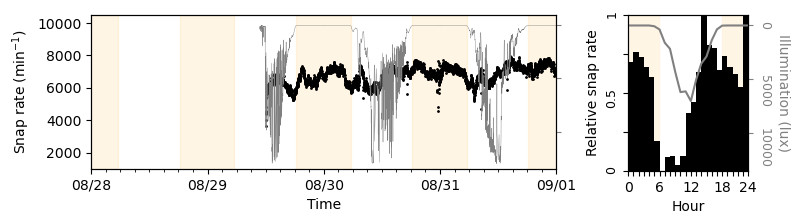

In [120]:
fig, ax = plt.subplots(1, figsize=(6, 2))
ax0 = ax.twinx()
ymin=1000
ymax=10500
for ii in range(-4,4):
    temp = datetime(year,align_mm,align_day)+timedelta(days=ii)
    ax = plotnight(temp, ax, ymin, ymax)
    gettime = temp
    ax0 = plotlight(gettime, ax0)
ax.scatter(pd.to_datetime(alldf['Time']), alldf['Peak'], c='k', marker='o', s=1 )
ax.set_xlim(datetime(year,align_mm,align_day)-timedelta(days=2),datetime(year,align_mm,align_day)+timedelta(days=2))
ax.set_ylim(ymin, ymax)
ax.set_ylabel('Snap rate (min$^{-1}$)', fontsize=10)
ax.set_xlabel('Time', fontsize=10)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes
ax0.set_ylim(13500,-1000)
# ax0.set_yscale('log')


ax2 = fig.add_axes([1.02,0.1,0.2,0.78])
ax3 = ax2.twinx()
light_key, light_mean = plot_histlight(datetime(year,align_mm,align_day)-timedelta(days=3),datetime(year,align_mm,align_day)+timedelta(days=3))

plot_time = index.keys() #list(index.keys())[12:]+list(index.keys())[0:12]
plot_mean = (mean-min(mean))/ (max(mean)-min(mean)) #mean[12:]+mean[0:12] (mean-np.mean(mean)) / np.std(mean) #
plot_light = light_mean #light_mean[12:]+light_mean[0:12]

ax2.bar(plot_time, plot_mean, width=1, color='white', align='edge',  alpha=0.)
ax2.fill_betweenx(x1='0', x2='6', y=[0,1], color='orange', lw=0.2, alpha=0.1)
ax2.fill_betweenx(x1='18', x2='23', y=[0,1], color='orange', lw=0.2, alpha=0.1)
ax2.bar(plot_time, plot_mean, width=1, color='k', align='edge')

ax2.set_xlim(0, 23)
ax2.set_ylim(0., 1)
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax2.yaxis.set_ticklabels(labels=['0','','0.5','','1'])
ax2.tick_params(axis='y', labelrotation=90, labelsize=9)
ax2.set_xlabel('Hour', fontsize=10)
ax2.set_ylabel('Relative snap rate', fontsize=10)

ax3.plot(plot_time, plot_light, lw=1.5, color='grey')
ax3.set_ylim(13500,-1000)
ax3.set_ylabel('Illumination (lux)', color='grey', fontsize=10, rotation=270, labelpad=14)
ax3.set_yticks([0, 5000, 10000])
ax3.tick_params(axis='y', colors='grey', labelrotation=270, labelsize=9)
ax2.xaxis.set_ticklabels(['0','','','','','','6','','','','','','12','','','','','','18','','','','','24'])
# ax2.xaxis.set_ticklabels(['12','','','','','','18','','','','','','0','','','','','','6','','','','', '11'])


# plt.vlines(x='6', ymin=ymin, ymax=ymax, ls='--', color='lightgrey', lw=1)
# plt.grid(axis='x')
